## knnexample

From A First Course in Machine Learning, Chapter 5.

Simon Rogers, 01/11/21 [simon.d.rogers@gmail.com]

Example of K-Nearest Neighbours

In [2]:
import numpy as np
import pylab as plt
%matplotlib inline

Generate some data

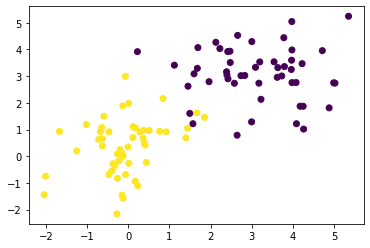

In [71]:
n = 50
X1 = np.random.multivariate_normal(
    [0, 0],
    np.eye(2),
    size=n
)
X2 = np.random.multivariate_normal(
    [3, 3],
    np.eye(2),
    size=n
)
t1 = np.ones(n, int)
t2 = np.zeros(n, int)

X = np.vstack((X1, X2))
t = np.hstack((t1, t2))

plt.scatter(X[:, 0], X[:, 1], c=t)


In [98]:
class KNN(object):
    def __init__(self, X, t, K):
        self.X = X
        self.t = t
        self.K = K
        self.classes = sorted(np.unique(self.t))
    
    def classify(self, testX):
        testN, _ = testX.shape
        predictions = np.zeros(testN, int)
        for n in range(testN):
            # compute squared distance between test point and train points
            distances = ((self.X - testX[n, :][None, :])**2).sum(axis=1)
            
            # arg sort to get sorting indices
            idx = np.argsort(distances)
            
            # find the top K classes
            votes = self.t[idx[:self.K]]
            
            # tally the votes
            v_counts = [list(votes).count(i) for i in self.classes]
            
            # sort the counts and keep all tied at the top
            count_class = list(zip(v_counts, self.classes))
            count_class.sort(key = lambda x: x[0], reverse=True)
            possible_classes = []
            for count, cl in count_class:
                if count == count_class[0][0]:
                    possible_classes.append(cl)
                else:
                    break # must be past the tie
            
            # randomly break a tie
            predictions[n] = np.random.choice(possible_classes)
            
        return predictions
    
    def __str__(self):
        return f'KNN classifier (K={self.K})'
            
            
        

In [103]:
# plot some contours
def plot_contours(X, t, classifier, MIN_X=-2,
                  MAX_X=6, MIN_Y=-2, MAX_Y=5,
                  n_x=50, n_y=60, levels=[0.5]):
    
    xv = np.linspace(MIN_X, MAX_X, n_x)
    yv = np.linspace(MIN_Y, MAX_Y, n_y)
    
    Xg, Yg = np.meshgrid(xv, yv)
    
    gridX = np.hstack((
        Xg.ravel()[:, None],
        Yg.ravel()[:, None]
    ))
    
    preds = classifier.classify(gridX)

    Z = np.reshape(preds, (n_y, n_x))

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.scatter(X[:, 0], X[:, 1], c=t)
    CS = ax.contour(Xg, Yg, Z, levels=levels, colors='k')
    ax.clabel(CS, CS.levels, inline=True, fontsize=10)
    ax.set_title(str(classifier))


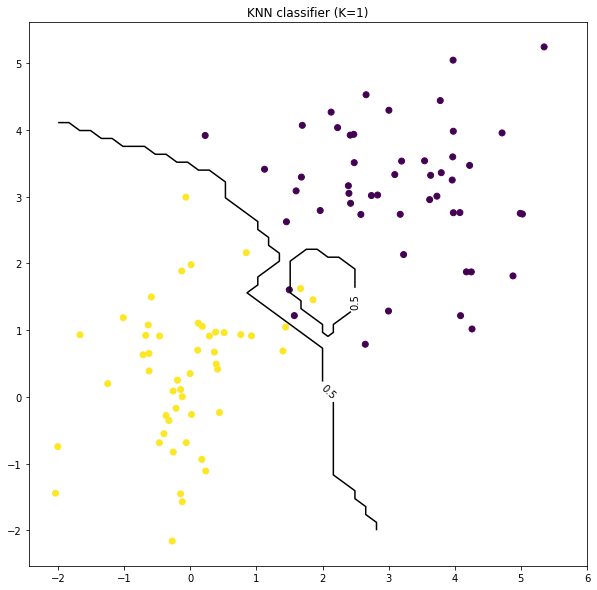

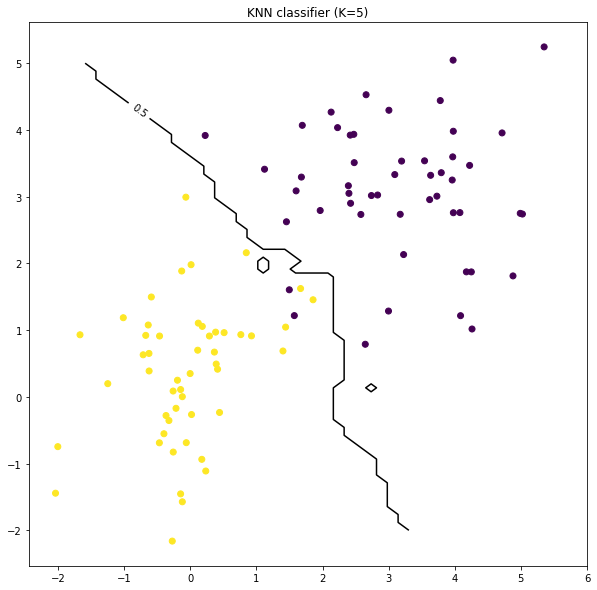

In [104]:
plot_contours(X, t, KNN(X, t, 1))
plot_contours(X, t, KNN(X, t, 5))